---------------------------
NewYorkNY


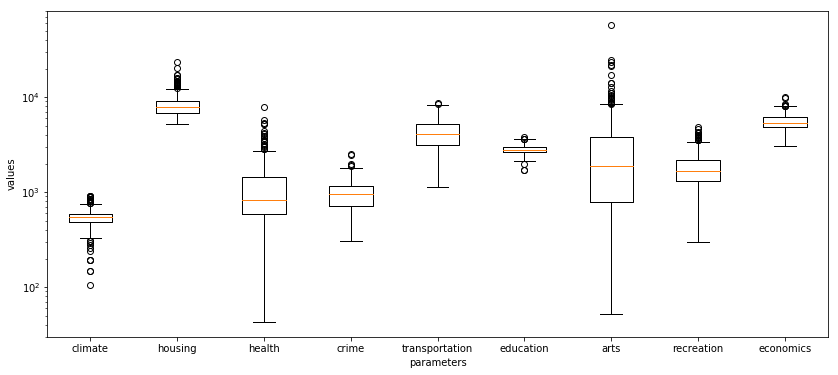

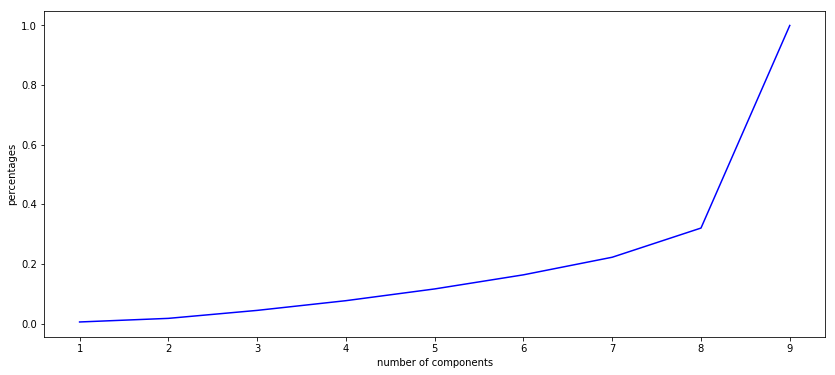

variance:0.017337462356017845


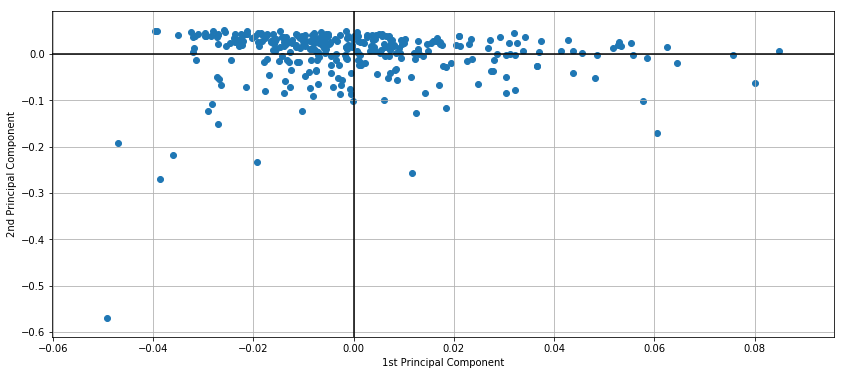

In [2]:
from pcaImp import pca
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

# Load data
X=np.genfromtxt('./cities.txt',delimiter=',',skip_header=1,usecols=range(1,10))
names=np.genfromtxt('./cities.txt',delimiter=',',skip_header=1,usecols=[0],dtype=str)
with open('./cities.txt', 'r') as f:
    first_line = f.readline()
column=first_line.strip().split(',')
column.pop(0)
#print column

#plot distribution over features
fig, ax1 = plt.subplots(figsize=(14,6))
plt.boxplot(X)
ax1.xaxis.grid(False)
ax1.set_xticklabels(column)
ax1.set_yscale('log')
plt.xlabel('parameters')
plt.ylabel('values')

###
print("---------------------------")
#arts is column 6
print(names[X[:,6].argmax()])
plt.show()

#normalize the data so that we can have uniform ranges in their values (prettier plotting too..we could standardize them)
X = X/np.linalg.norm(X,axis=0)

#perform PCA
#percentage of the feature space according to eigenvalues
perc_=[]
for i in range(1,10):
    (Y,perc,comp)=pca(X,i)
    perc_.append(perc)

fig, ax1 = plt.subplots(figsize=(14,6))
plt.plot(range(1,10),perc_,'b-',label="eigen percentage")
plt.xlabel('number of components')
plt.ylabel('percentages')
plt.show()

(Y,perc,comp)=pca(X,2)
print("variance:"+str(perc))
#calculate how important each feature was
scr=np.dot(np.linalg.inv(np.diag(np.std(X,axis=0))),comp)
#scale results to match when we plot them
scr = scr/np.linalg.norm(scr,axis=0)

 
 
 
#scatter plot on principal components
##we need this function only to update the scatter plot when we select points
def onpick(event,axes,Y):
    ind = event.ind
    axes.annotate(names[ind], (Y[ind,0],Y[ind,1]))
    plt.draw()
###############
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.scatter(Y[:, 0], Y[:, 1],picker=True)
fig.canvas.mpl_connect('pick_event', partial(onpick, axes=ax1, Y=Y))


ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')


plt.show()